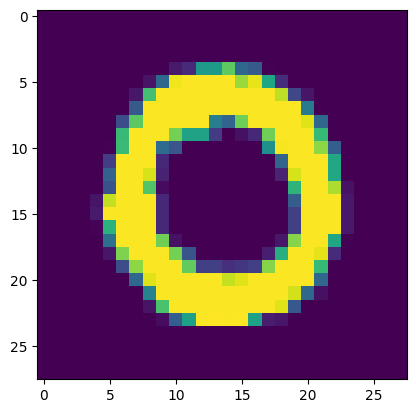

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mnist_data = pd.read_csv('./mnist.csv').values

labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]
img_size = 28
plt.imshow(digits[1].reshape(img_size, img_size))
plt.show()

In [78]:
# a majority baseline class

class MajorityBaselineClassifier:
    """Baseline model for text classification that classifies every input as the most common class
    in the dataset."""

    def __init__(self) -> None:
        self.name = "Majority baseline classifier"
        self.prediction = 0
        self.number_counts = {}

    def train(self):
        """Find most common class and set it as the value to be predicted.
        """
        # Count occurrences of each number
        self.number_counts = {}
        for number in labels:
            if number in self.number_counts:
                self.number_counts[number] += 1
            else:
                self.number_counts[number] = 1

        # Find the most common number
        most_common_number = max(self.number_counts, key=self.number_counts.get)
        self.prediction = most_common_number

    def predict_act(self, *args,**kwargs):
        """Return the dialog act found to be most common during training.
        """
        return self.prediction

    def predict(self, x_test: pd.DataFrame):
        """Return the prediction for each element in a test set.
        """
        return [self.predict_act(element) for element in x_test]


In [79]:
baseline = MajorityBaselineClassifier()
baseline.train()
baseline_accuracy = baseline.number_counts[baseline.prediction]/len(labels)
print(baseline_accuracy)

0.11152380952380953


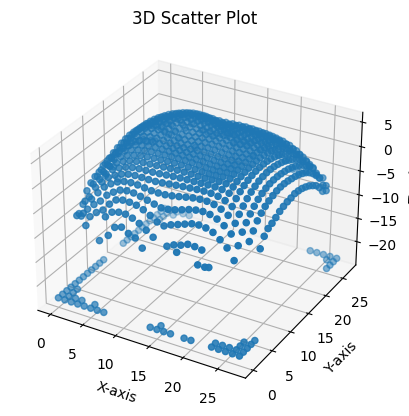

In [80]:
# compute mean for each digit class
pixel_mean = [np.mean(digits[:, i]) for i in range(0, 28 * 28)]
# compute standard deviation for each digit class
pixel_std = [np.std(digits[:, i]) for i in range(0, 28 * 28)]
pixel_mean = np.array(pixel_mean) + 0.0000000001
pixel_mean = np.log(pixel_mean)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [i // 28 for i in range(0, 28 * 28)]
y = [i % 28 for i in range(0, 28 * 28)]
ax.scatter(x, y, pixel_mean)

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

In [81]:
pixel_mean = pixel_mean.reshape(img_size, img_size)
print('The pixels positioned at :')
formattingCounter = 0
for xIndex, xValue in enumerate(pixel_mean):
    for yIndex, yValue in enumerate(xValue):
        if yValue < -15:
            formattingCounter += 1
            print(f'<X:{xIndex},\tY:{yIndex}>\t\t' ,end="")
        if formattingCounter == 7:
            print()
            formattingCounter = 0
print('\nHave no useful information and can be excluded')

The pixels positioned at :
<X:0,	Y:0>		<X:0,	Y:1>		<X:0,	Y:2>		<X:0,	Y:3>		<X:0,	Y:4>		<X:0,	Y:5>		<X:0,	Y:6>		
<X:0,	Y:7>		<X:0,	Y:8>		<X:0,	Y:9>		<X:0,	Y:10>		<X:0,	Y:11>		<X:0,	Y:16>		<X:0,	Y:17>		
<X:0,	Y:18>		<X:0,	Y:19>		<X:0,	Y:20>		<X:0,	Y:21>		<X:0,	Y:22>		<X:0,	Y:23>		<X:0,	Y:24>		
<X:0,	Y:25>		<X:0,	Y:26>		<X:0,	Y:27>		<X:1,	Y:0>		<X:1,	Y:1>		<X:1,	Y:2>		<X:1,	Y:3>		
<X:1,	Y:24>		<X:1,	Y:25>		<X:1,	Y:26>		<X:1,	Y:27>		<X:2,	Y:0>		<X:2,	Y:1>		<X:2,	Y:26>		
<X:2,	Y:27>		<X:3,	Y:0>		<X:3,	Y:1>		<X:3,	Y:27>		<X:4,	Y:0>		<X:4,	Y:27>		<X:5,	Y:0>		
<X:5,	Y:1>		<X:6,	Y:0>		<X:7,	Y:0>		<X:14,	Y:0>		<X:15,	Y:0>		<X:15,	Y:1>		<X:16,	Y:0>		
<X:17,	Y:0>		<X:19,	Y:0>		<X:20,	Y:0>		<X:23,	Y:0>		<X:23,	Y:1>		<X:23,	Y:27>		<X:24,	Y:0>		
<X:24,	Y:1>		<X:24,	Y:27>		<X:25,	Y:0>		<X:25,	Y:1>		<X:25,	Y:27>		<X:26,	Y:0>		<X:26,	Y:1>		
<X:26,	Y:2>		<X:26,	Y:3>		<X:26,	Y:26>		<X:26,	Y:27>		<X:27,	Y:0>		<X:27,	Y:1>		<X:27,	Y:2>		
<X:27,	Y:3>		<X:27,	Y:4>		<X:27,	Y:24>		<X:27,	Y:25>		<X:27,	Y:26>		<X:

In [82]:
# create ink feature
import numpy as np
ink = np.array([sum(row) for row in digits])
# compute mean for each digit class
ink_mean_per_class = [np.mean(ink[labels == i]) for i in range(10)]
# compute standard deviation for each digit class
ink_std_per_class = [np.std(ink[labels == i]) for i in range(10)]

The ink mean : [34632.40755082285, 15188.466268146884, 29871.099353603066, 28320.188002757986, 24232.72249508841, 25835.920421607378, 27734.917331399563, 22931.244262667577, 30184.148412503077, 24553.75]


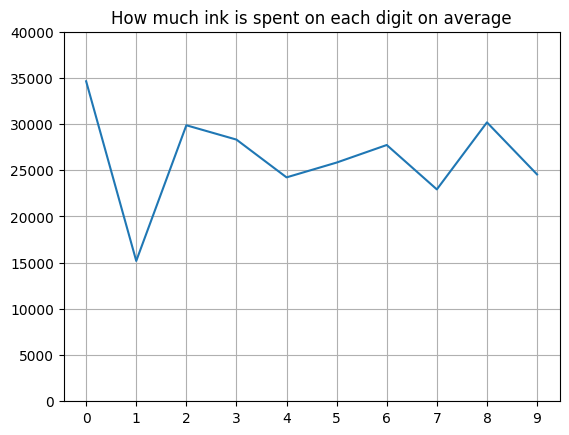

In [83]:
print(f"The ink mean : {ink_mean_per_class}")
plt.ylim([0,40000])
plt.xticks([*range(0,10)])
plt.grid(True)
plt.title("How much ink is spent on each digit on average")
plt.plot(range(0,10),ink_mean_per_class)

The ink std.dev : [8461.892043158483, 4409.461697281539, 7653.006198983366, 7574.104535679545, 6374.633457092554, 7526.602988920305, 7530.503187255003, 6168.3408781754315, 7777.396357381105, 6465.231330430596]


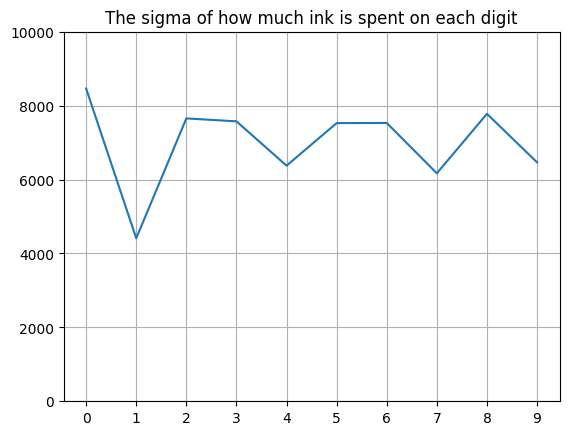

In [84]:
print(f"The ink std.dev : {ink_std_per_class}")
plt.ylim([0,10000])
plt.xticks([*range(0,10)])
plt.title("The sigma of how much ink is spent on each digit")
plt.grid(True)
plt.plot(range(0,10),ink_std_per_class)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Assume you want to use the pixel values of the first feature (feature index 0)
X = (ink - np.mean(ink))/np.std(ink)
X.reshape(-1, 1)
y = labels
y.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.33862577 -1.48066314 -0.44948264 ...  0.41551207 -0.24462759
  1.08980744].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

# Evaluate the model using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)